In [41]:
import geopandas
import shapely
import numpy
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [23]:
aligned = geopandas.read_file(r"C:\Users\pearsonra\Documents\data\river_bathemetry\waikanae_new_lidar\caches\100000000\aligned_channel_100000000.geojson")

## Extended line offshore from the aligned line

In [56]:
(x,y) = aligned.loc[0].geometry.xy
segment_dx = x[0] - x[1]
segment_dy = y[0] - y[1]
segment_length = numpy.sqrt(segment_dx**2 + segment_dy**2)
tangen_dx = segment_dx / segment_length
tangen_dy = segment_dy / segment_length

In [149]:
length = 1000
extended_line = shapely.geometry.LineString([[x[0], y[0]], [x[0] + length * tangen_dx, y[0] + length * tangen_dy]])
mouth_point = shapely.geometry.Point([x[0], y[0]])

<AxesSubplot:>

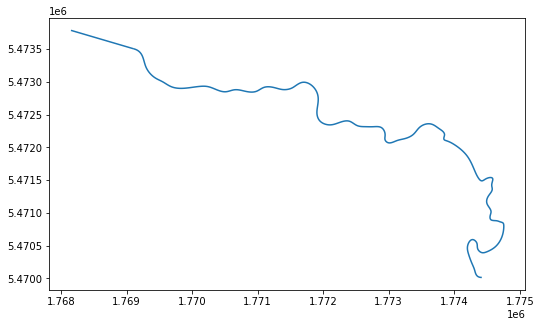

In [150]:
import matplotlib
f, ax = matplotlib.pyplot.subplots(figsize=(10, 5))
aligned.append(geopandas.GeoDataFrame(geometry=[extended_line], crs=aligned.crs)).plot(ax=ax)

## River depths and widths, and ocean depths to specify fan dimensions

Record only the depth and width at the river mouth

In [151]:
river_mouth_depth = geopandas.read_file(r"C:\Users\pearsonra\Documents\data\river_bathemetry\waikanae_new_lidar\caches\100000000\river_bathymetry_all_widths.geojson")['bed_elevation_Smart_et_al'].iloc[0]
river_mouth_width = geopandas.read_file(r"C:\Users\pearsonra\Documents\data\river_bathemetry\waikanae_new_lidar\caches\100000000\final_values.geojson")['widths'].iloc[0]

Take the smallest contours that are more than twice the depth of the river mouth

In [152]:
ocean_contours = geopandas.read_file(r"C:\Users\pearsonra\Documents\data\Waikanae\caches\nz21_kapiti\50849\bathymetry_contours.zip")
ocean_contours = ocean_contours[ocean_contours['valdco'] == ocean_contours['valdco'][ocean_contours['valdco'] > 2 * river_mouth_depth * -1 ].min()].reset_index(drop=True)

Find the first of these contours to intersect with the extended river line

In [154]:
distance = numpy.inf
end_point = shapely.geometry.Point()

for i, row in ocean_contours.iterrows():
    if row.geometry.intersects(extended_line):
        intersection_point = row.geometry.intersection(extended_line)
        if intersection_point.distance(aligned.iloc[0].geometry) < distance:
            distance = intersection_point.distance(mouth_point)
            end_point = intersection_point
    

Define a fan polygon with initial width of the mouth width measurements increasing in width by x degree on each side. 

In [156]:
fan_line = shapely.geometry.LineString([mouth_point, end_point])

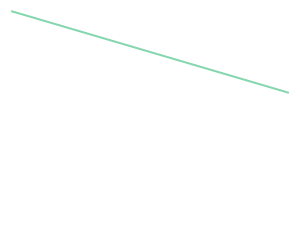

In [157]:
fan_line

<AxesSubplot:>

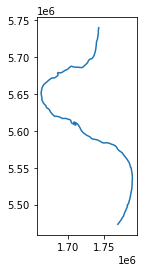

In [137]:
ocean_contours.loc[[3]].plot()

In [121]:
print(distances['intersection_point'][1])

LINESTRING EMPTY


<AxesSubplot:>

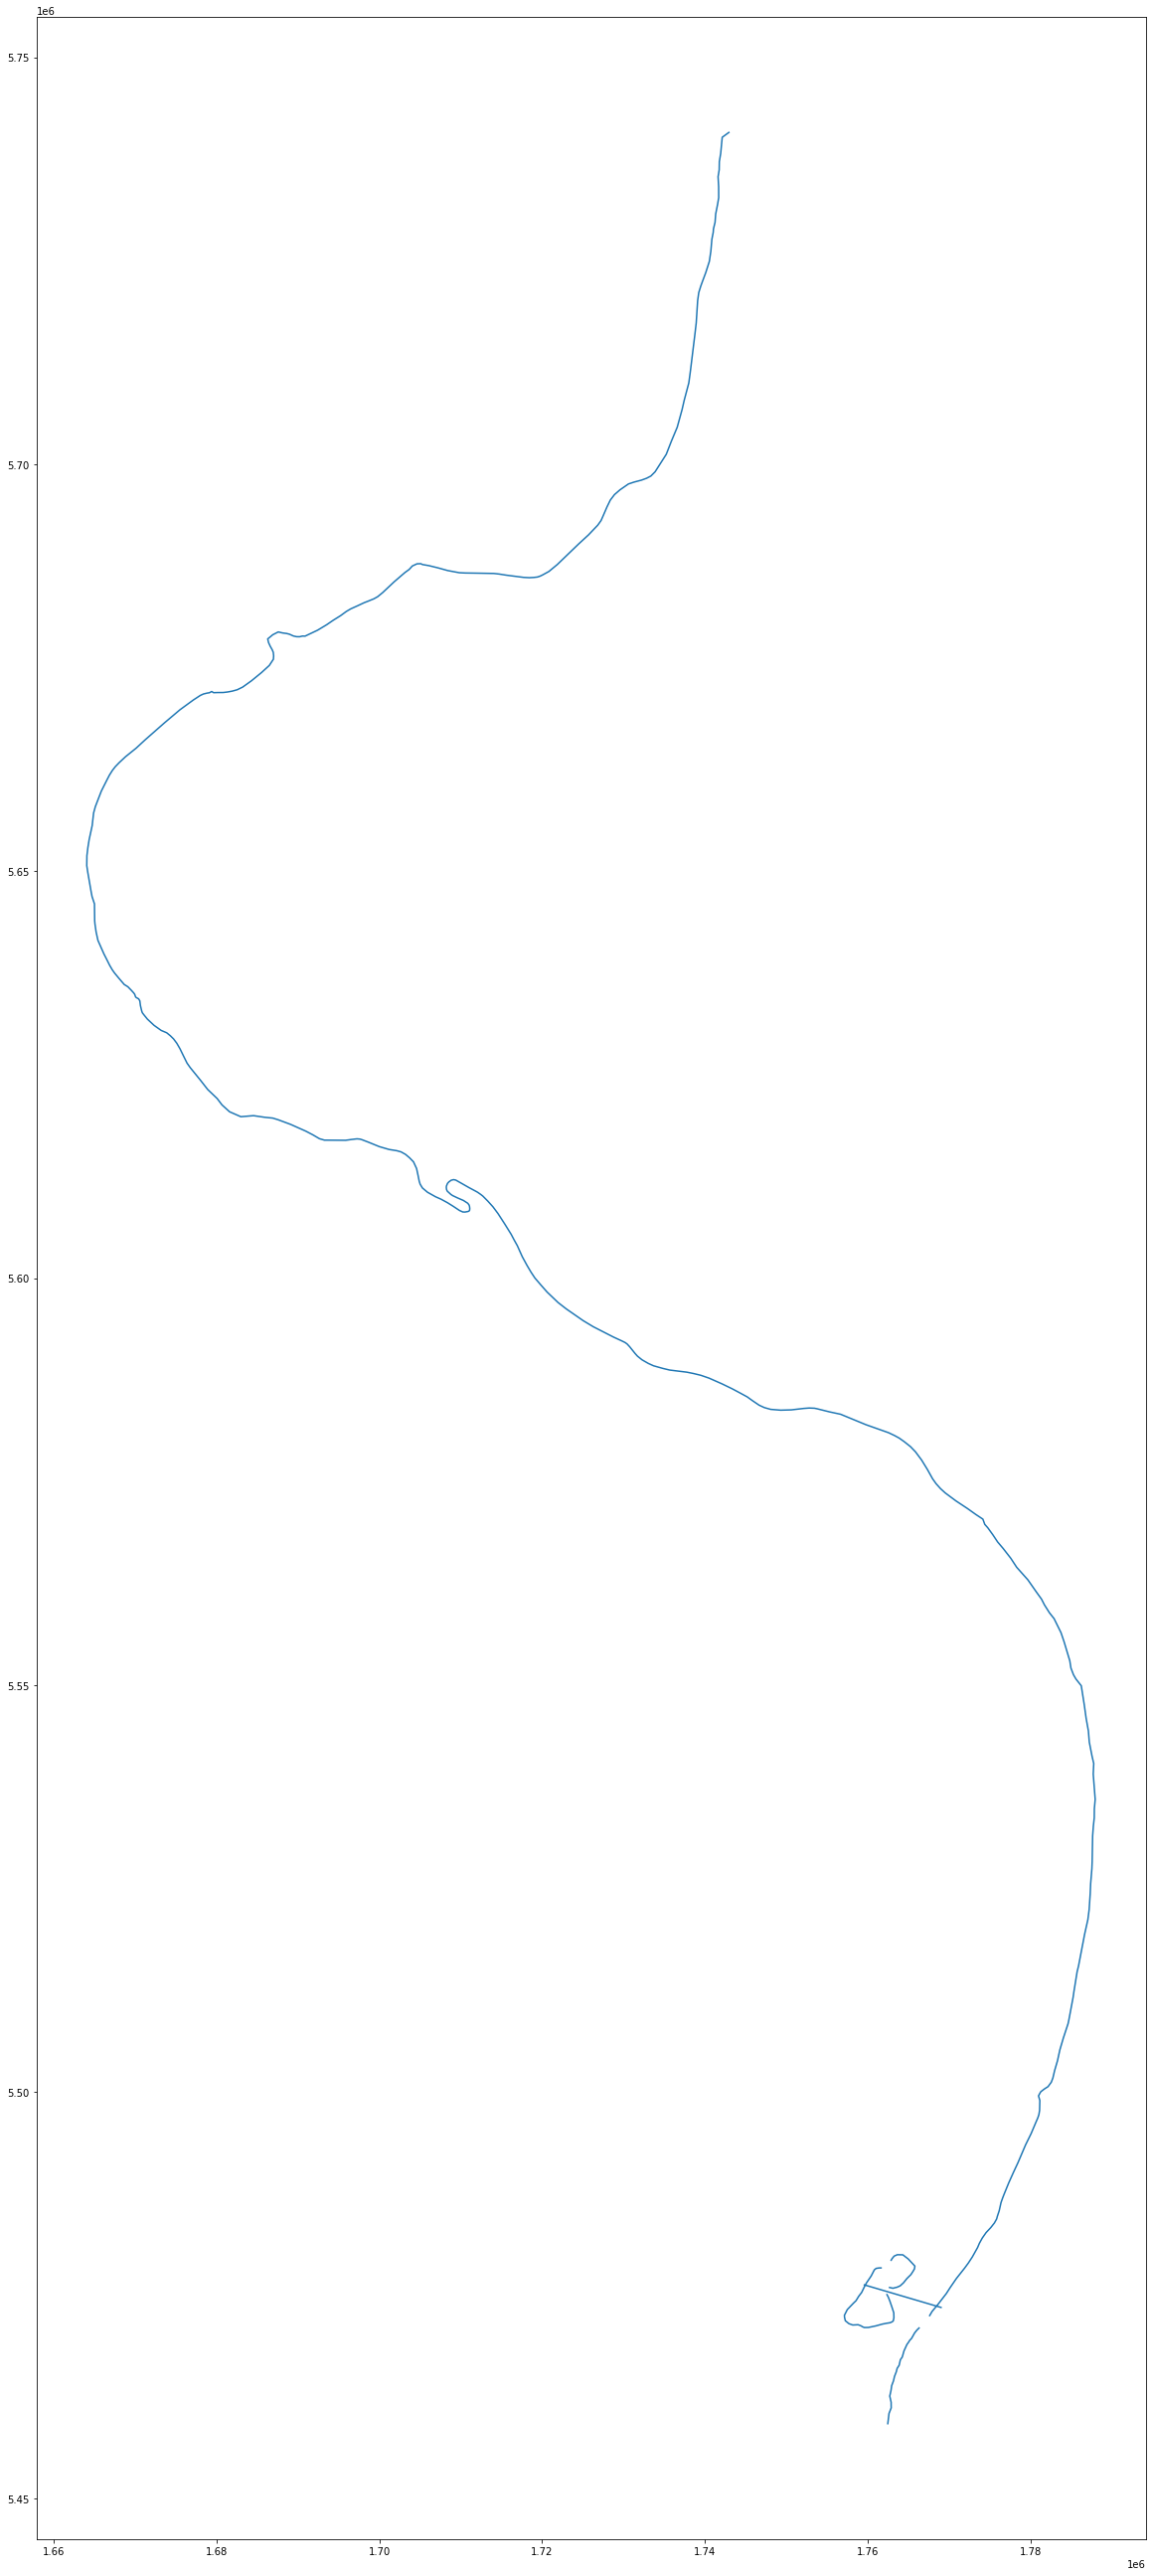

In [101]:
import matplotlib
f, ax = matplotlib.pyplot.subplots(figsize=(20, 50))
ocean_contours.append(extended_line).plot(ax=ax)